# FaceGAN

Inspired by [this](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html) tutorial.

Hello! In this notebook we'll train a GAN to generate images of faces. We'll set up the dataset, ... TODO fill in overview



In [1]:
%matplotlib inline

# Functions for training neural network
from tools import *
import torch
import torch.optim as optim
import os

# Functions for visualizations
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

## Data

...instructions on how to download zip file, extract, and place under 'data' folder...

To train a GAN, we need to keep giving it examples of what real images should look like. Right now, we have a folder with all of these images. How do we go from images saved as files on our computer to images in number-form that are ready for a neural network to use?

Fortunately, the machine learning framework that we are using called PyTorch can do this for us. We've placed most of the PyTorch code for this in the file **tools/data.py**, but this is what it's doing behind the scenes:

1. Reads each image file into a list of numbers that specify the color at each pixel
2. Processes each image to the correct size and range of values
3. Creates a **data loader**, which keeps track of which images the GAN used already so it can keep giving it new ones in each round of training

The code below creates the data loader and plots some sample images.


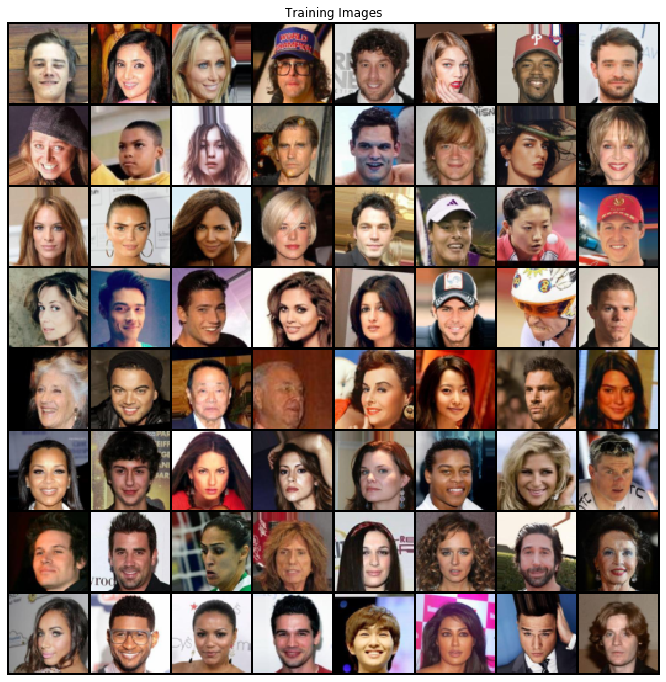

In [2]:
# Folder where images are stored
dataroot = "data/faces"

# Batch size: number of images the GAN sees in one round of training
batch_size = 128

# Size of images, in pixels (they will be square)
image_size = 64

dataloader = get_dataloader(dataroot, image_size, batch_size)

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(12,12))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0][:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

### Input to the generator

Remember that the input to the generator model is just a random bunch of numbers.
Let's see what that looks like - it'll help you appreciate how difficult this problem is!

Note: The actual input is 1-dimensional - just a list of numbers. We'll create noise in the shape of a square just for visualization.

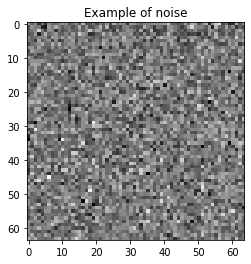

In [3]:

noise = torch.randn(64,64)
plt.imshow(noise, cmap='gray')
plt.title('Example of noise')
plt.show()

## Creating the models


Let's now create the generator and discriminator models.

In [4]:
# Size of noise vector (i.e. size of generator input)
noise_size = 100

# Use a GPU if available, or you can choose to use the CPU by setting use_cpu = True
use_cpu = False
device = 'cuda:7' if (torch.cuda.is_available() and not use_cpu) else 'cpu'
print('Using device {}\n'.format(device))


generator     = Generator(noise_size).to(device)
discriminator = Discriminator().to(device)

# Initialize the weights of the networks
generator.apply(initialize_weights)
discriminator.apply(initialize_weights)

# Print out the network structure
print('Generator structure:')
print(generator)
print('\n')

print('Discriminator structure:')
print(discriminator)

Using device cuda:7

Generator structure:
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(

## Training the GAN

We'll now 

In [5]:
# Training settings
number_of_epochs = 2
learning_rate    = 0.0002


# Create optimizers, which are functions that will update the models for us
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
generator_optimizer     = optim.Adam(generator.parameters(),     lr=learning_rate, betas=(0.5, 0.999))

# Create batch of noise that we will use to visualize
# the progression of the generator
fixed_noise = torch.randn(64, noise_size, 1, 1, device=device)

# Create folder to save models in case training is interrupted
save_dir = './saved_models'
os.makedirs(save_dir, exist_ok=True)



Starting Training Loop...
****** Starting epoch 0 ******


Iteration 0.	Loss_D: 2.1146	Loss_G: 5.9911	Prob real: 0.6956	Prob fake: 0.0045
Iteration 100.	Loss_D: 0.7241	Loss_G: 20.2598	Prob real: 0.9550	Prob fake: 0.0000
Iteration 200.	Loss_D: 1.1403	Loss_G: 1.6598	Prob real: 0.4499	Prob fake: 0.3010
Iteration 300.	Loss_D: 0.7506	Loss_G: 3.8984	Prob real: 0.7337	Prob fake: 0.0386
Iteration 400.	Loss_D: 0.6134	Loss_G: 4.3427	Prob real: 0.9203	Prob fake: 0.0464
Iteration 500.	Loss_D: 0.4737	Loss_G: 5.4430	Prob real: 0.8332	Prob fake: 0.0107
Iteration 600.	Loss_D: 0.3744	Loss_G: 4.1298	Prob real: 0.8047	Prob fake: 0.0260
Iteration 700.	Loss_D: 0.6300	Loss_G: 3.9524	Prob real: 0.8052	Prob fake: 0.0392
Iteration 800.	Loss_D: 0.6487	Loss_G: 5.1347	Prob real: 0.9195	Prob fake: 0.0116
Iteration 900.	Loss_D: 0.2899	Loss_G: 3.7963	Prob real: 0.8904	Prob fake: 0.0346
Iteration 1000.	Loss_D: 0.3873	Loss_G: 3.2767	Prob real: 0.8091	Prob fake: 0.0661
Iteration 1100.	Loss_D: 0.4243	Loss_G: 4.5612	Prob real: 0.7963	Prob fake: 0.0210
Iteration 1200.	Loss_D: 0.7

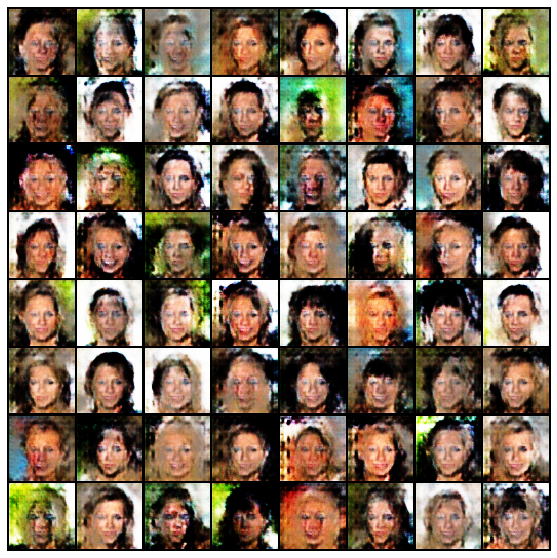

****** Starting epoch 1 ******


Iteration 0.	Loss_D: 0.7425	Loss_G: 5.8662	Prob real: 0.9307	Prob fake: 0.0064
Iteration 100.	Loss_D: 0.9938	Loss_G: 4.3153	Prob real: 0.9675	Prob fake: 0.0304
Iteration 200.	Loss_D: 1.0856	Loss_G: 5.6324	Prob real: 0.9586	Prob fake: 0.0066
Iteration 300.	Loss_D: 0.6590	Loss_G: 5.3356	Prob real: 0.9134	Prob fake: 0.0091
Iteration 400.	Loss_D: 0.7109	Loss_G: 4.7613	Prob real: 0.9095	Prob fake: 0.0171
Iteration 500.	Loss_D: 0.5076	Loss_G: 4.2996	Prob real: 0.8164	Prob fake: 0.0264
Iteration 600.	Loss_D: 0.5193	Loss_G: 4.3582	Prob real: 0.8431	Prob fake: 0.0211
Iteration 700.	Loss_D: 0.4844	Loss_G: 3.3990	Prob real: 0.8647	Prob fake: 0.0501
Iteration 800.	Loss_D: 0.4983	Loss_G: 3.4606	Prob real: 0.8244	Prob fake: 0.0466
Iteration 900.	Loss_D: 0.4741	Loss_G: 3.5050	Prob real: 0.8297	Prob fake: 0.0503
Iteration 1000.	Loss_D: 1.6401	Loss_G: 0.3625	Prob real: 0.2935	Prob fake: 0.7310
Iteration 1100.	Loss_D: 0.6086	Loss_G: 3.3747	Prob real: 0.8315	Prob fake: 0.0467
Iteration 1200.	Loss_D: 0.92

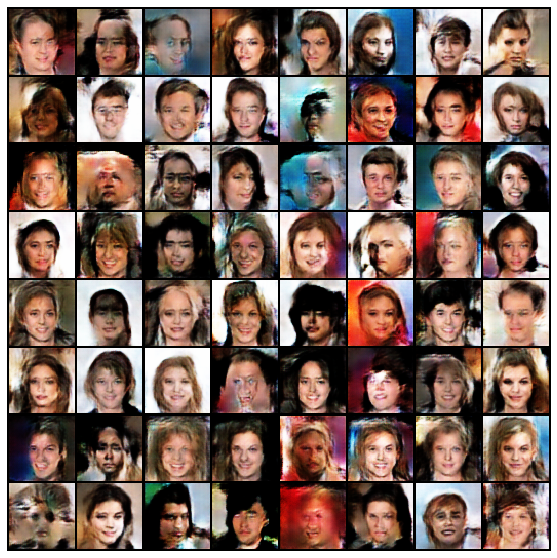

In [6]:
# Training Loop

# Lists to keep track of progress
sample_generator_images = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")

# For each epoch
for epoch in range(number_of_epochs):
    print('****** Starting epoch {} ******'.format(epoch))
    
    # For each batch in the dataloader
    for iteration, data in tqdm(enumerate(dataloader), total=len(dataloader)):
    
        # Parse data into the correct format for training
        real_images, labels_real, labels_fake, noise = format_data(data, device, noise_size)
        
        ############################
        # (1) Update Discriminator
        ###########################
        discriminator.zero_grad()
        
        # Train discriminator on all-real batch
        predictions_on_real = discriminator(real_images)
        loss_on_real        = calculate_loss(predictions_on_real, labels_real)
        
        # Train discriminator on all-fake batch
        fake_images         = generator(noise)
        predictions_on_fake = discriminator(fake_images.detach())
        loss_on_fake        = calculate_loss(predictions_on_fake, labels_fake)
        
        # Update the discriminator model
        discriminator_loss = loss_on_real + loss_on_fake
        update(discriminator_optimizer, discriminator_loss)
        

        ############################
        # (2) Update Generator
        ###########################
        generator.zero_grad()
        
        # Try to fool discriminator into predicting that fake images are real
        predictions_on_fake = discriminator(fake_images)
        generator_loss      = calculate_loss(predictions_on_fake, labels_real)
        update(generator_optimizer, generator_loss)

        # Output training stats every 100 iterations
        if iteration % 100 == 0:
            print('Iteration %d.\tLoss_D: %.4f\tLoss_G: %.4f\tProb real: %.4f\tProb fake: %.4f'
                  % (iteration,
                     discriminator_loss.item(),
                     generator_loss.item(),
                     predictions_on_real.mean().item(),
                     predictions_on_fake.mean().item()))
            
        # Save Losses for plotting later
        G_losses.append(generator_loss.item())
        D_losses.append(discriminator_loss.item())
        
        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == number_of_epochs-1) and (iteration == len(dataloader)-1)):
            with torch.no_grad():
                fake = generator(fixed_noise).detach().cpu()
            samples = vutils.make_grid(fake, padding=2, normalize=True)
            sample_generator_images.append(samples)
            
        iters += 1
        
        
    # Save models in case training is interrupted
    print('Saving models to {}'.format(save_dir))
    save_model(discriminator, discriminator_optimizer, epoch, os.path.join(save_dir, 'discriminator'))
    save_model(generator,     generator_optimizer,     epoch, os.path.join(save_dir, 'generator'))

    
    # Show some sample generated images after each epoch
    fig = plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.imshow(np.transpose(sample_generator_images[-1], (1,2,0)))
    plt.show()